In [46]:
import numpy as np
import pandas as pd

In [47]:
encoding = 'latin1'
df = pd.read_csv('spam.csv', encoding=encoding)

In [48]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1373,spam,"Bears Pic Nick, and Tom, Pete and ... Dick. In...",NaN,NaN,NaN
5020,ham,:-( sad puppy noise,NaN,NaN,NaN
3287,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN
4525,spam,"I want some cock! My hubby's away, I need a re...",NaN,NaN,NaN
4235,spam,U can WIN å£100 of Music Gift Vouchers every w...,NaN,NaN,NaN


In [49]:
df.shape

(5572, 5)

1. Data Cleaning: Removing NaN values
2. EDA
3. Text preprocessing: Vectorisation, stemming, stopwords
4. Model Building
5. Evaluation
6. Improvement
7. website
8. Deploy

1. DATA CLEANING

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [51]:
#drop last three columns because they are null
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [52]:
df.sample(5)

,v1,v2
3305,ham,HI DARLIN I FINISH AT 3 DO U 1 2 PICK ME UP OR...
5361,ham,Yep get with the program. You're slacking.
2406,ham,One of best dialogue in cute reltnship..!! \We...
738,ham,Wish i were with you now!
4967,ham,Future is not what we planned for tomorrow.......


In [53]:
#renaming the cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True) #inplace is for permanent operations
df.sample(5)

,target,text
2259,ham,Ill call you evening ill some ideas.
1816,ham,Are you going to write ccna exam this week??
3189,ham,Hi neva worry bout da truth coz the truth will...
3441,spam,Save money on wedding lingerie at www.bridal.p...
1007,ham,I don't quite know what to do. I still can't g...


In [54]:
import sklearn

In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [56]:
df['target'] = encoder.fit_transform(df['target'])

In [57]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [58]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [59]:
#check for duplicated values
df.duplicated().sum()

403

In [60]:
#remove duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

2. EDA

In [61]:
counts = df['target'].value_counts()

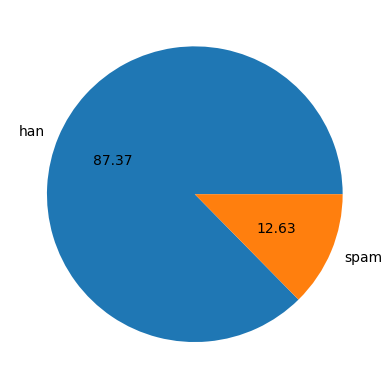

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
plt.pie(counts, labels=['han', 'spam'], autopct='%0.2f')
plt.show()

DATA IS IMBALANCED

we will now find three things
1. number of charecters in the sms
2. no. of charecters in the sentences and
3. no. of sentences in the messages

In [63]:
import nltk

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\sk
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [65]:
df['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [66]:
#number of charecters used
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [67]:
df['num_characters']=df['text'].apply(len)

In [68]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [69]:
#number of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\sk computer/nltk_data'
    - 'c:\\Users\\sk computer\\anaconda3\\envs\\sp\\nltk_data'
    - 'c:\\Users\\sk computer\\anaconda3\\envs\\sp\\share\\nltk_data'
    - 'c:\\Users\\sk computer\\anaconda3\\envs\\sp\\lib\\nltk_data'
    - 'C:\\Users\\sk computer\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [25]:
#number of words per sms
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
#number of sentences
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [28]:
df['num_sentences']=df['text'].apply(lambda x:len((nltk.sent_tokenize(x))))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
#to describe ham and spam messages separately
#ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

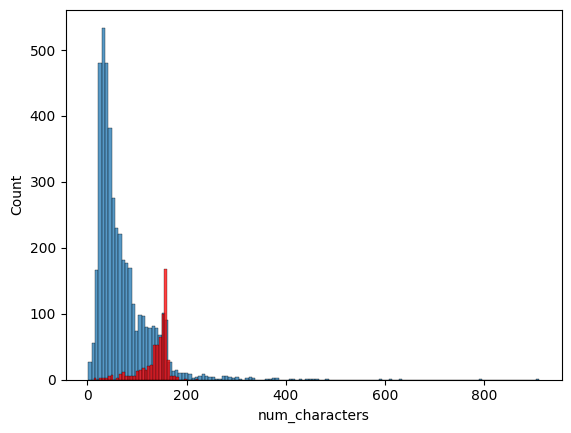

In [34]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

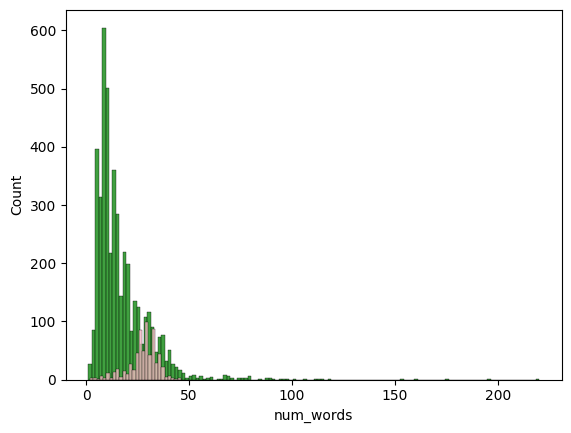

In [35]:
sns.histplot(df[df['target']==0]['num_words'],color='green')
sns.histplot(df[df['target']==1]['num_words'],color='pink')

<Axes: xlabel='num_sentences', ylabel='Count'>

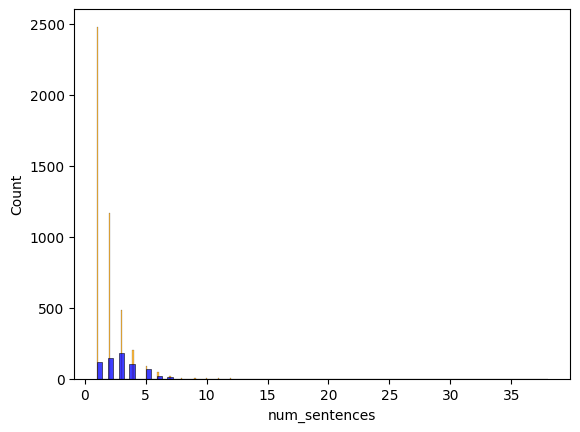

In [36]:
sns.histplot(df[df['target']==0]['num_sentences'],color='orange')
sns.histplot(df[df['target']==1]['num_sentences'],color='blue')

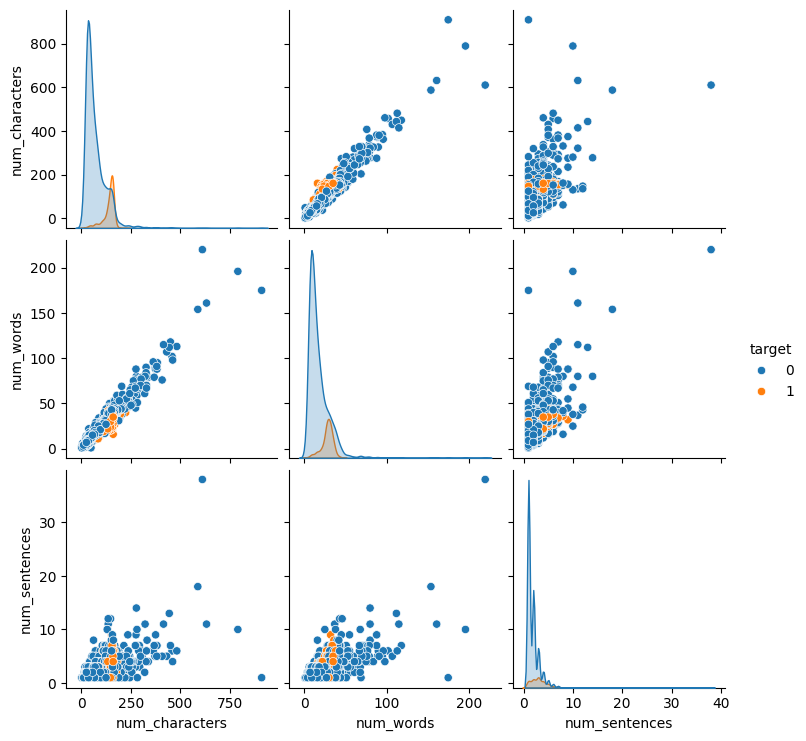

In [37]:
sns.pairplot(df,hue='target')

3. DATA PREPROCESSING
- Lower case
- Tokenization
- Removing special charecters
- Removing stop words and punctuation
- Stermming

In [38]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))
    
    transformed_text = " ".join(y)

    return transformed_text

[nltk_data] Downloading package punkt to C:\Users\sk
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\sk
[nltk_data]     computer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [41]:
df['transformed_text']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Generation word cloud to display repeated word in bold.

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

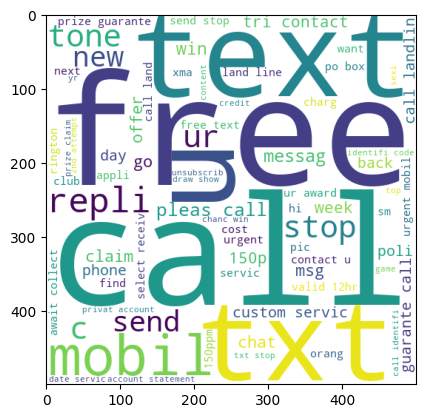

In [45]:
plt.imshow(spam_wc)

In [46]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

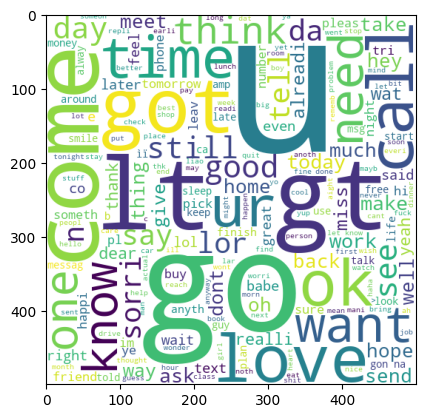

In [47]:
plt.imshow(ham_wc)

In [48]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [49]:
len(spam_corpus)

9939

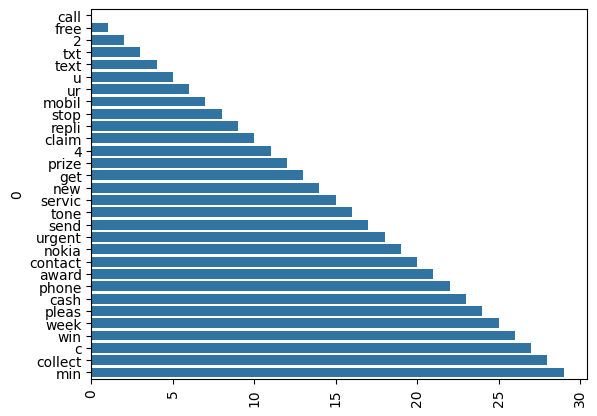

In [50]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

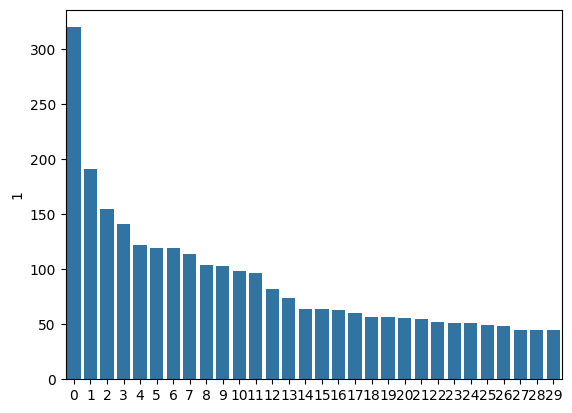

In [51]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [53]:
len(ham_corpus)

9939

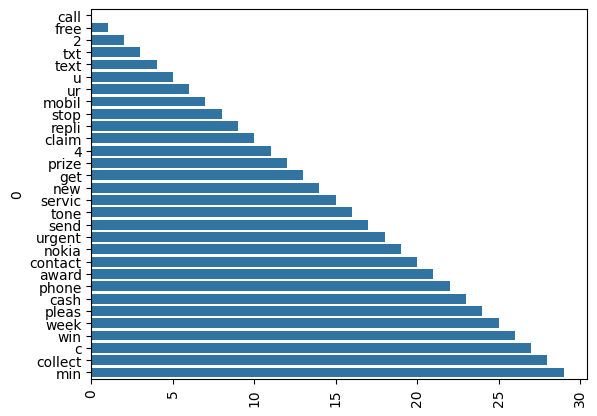

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

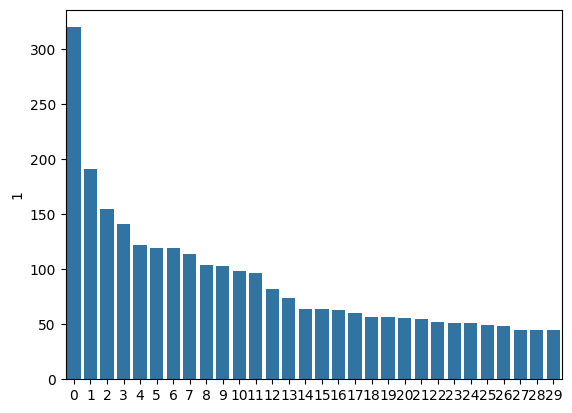

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#plt.xticks(rotation='vertical')
plt.show()

4. MODEL BUILDING
Navie-Byes model because it works best for textual data
For building navie-bayes algoritum numerical data is required to process the data so "transforemed_text" need to be changed to numerical data or in vectorised form.
METHODS
1. Bag of words:- collect the most frequent words from the messages and then save it in a variable to count them and the this count can be replaced by the words.
2. TFIDF
3. Word to vec

In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer()

In [57]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [58]:
X.shape

(5169, 6708)

In [59]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [65]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
#output is 1 that means it is not giving any false posivite output

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


MNB---->TFIDF

In [66]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


FOR THIS SPAM MAIL DETECTION OUR MODEL'S PRECISION SCORE MUST B E HIGH FOR THAT WE WILL USE MULTINOMINAL NAIVE-BYES CLASSIFIER AS IT'S PRESICION RATE IS THE HIGHEST.
PRECISION SCORE TELLS US THAT THEIR WAS NO SUCH SPAM MAIL THAT WE DID NOT DECTECTED RIGHT.
TFIDF ----> MNB

In [67]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [69]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
import xgboost as xgb

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
#hyper parametertuning
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2)
bc=BaggingClassifier(n_estimators=50, random_state=2)
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [73]:
#dictionary name of algorithm(key):variable(value)
clfs={
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' :bc,
    'ETC' : etc,
    'GBDT': gbdt,
    'xgb' : xgb
}

In [74]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [76]:
#this for loop is for the dictionary formed above to store accuracy and precision score
from sklearn.metrics import accuracy_score as sk_accuracy_score, precision_score as sk_precision_score

accuracy_list = []
precision_list = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For {name}")
    print(f"Accuracy - {current_accuracy}")
    print(f"Precision - {current_precision}")
    
    accuracy_list.append(current_accuracy)
    precision_list.append(current_precision)


For SVC
Accuracy - 0.9729206963249516
Precision - 0.9741379310344828
For KN
Accuracy - 0.9003868471953579
Precision - 1.0
For NB
Accuracy - 0.9593810444874274
Precision - 1.0
For DT
Accuracy - 0.9361702127659575
Precision - 0.8461538461538461
For LR
Accuracy - 0.9516441005802708
Precision - 0.94
For RF
Accuracy - 0.971953578336557
Precision - 1.0


c:\Users\sk computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9613152804642167
Precision - 0.9454545454545454
For BgC
Accuracy - 0.9584139264990329
Precision - 0.8625954198473282
For ETC
Accuracy - 0.9729206963249516
Precision - 0.9824561403508771
For GBDT
Accuracy - 0.9526112185686654
Precision - 0.9238095238095239
For xgb
Accuracy - 0.9729206963249516
Precision - 0.9435483870967742


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_list,'Precision':precision_list}).sort_values('Precision',ascending=False)

In [78]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [79]:
performance_df1= pd.melt(performance_df, id_vars="Algorithm")

In [80]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


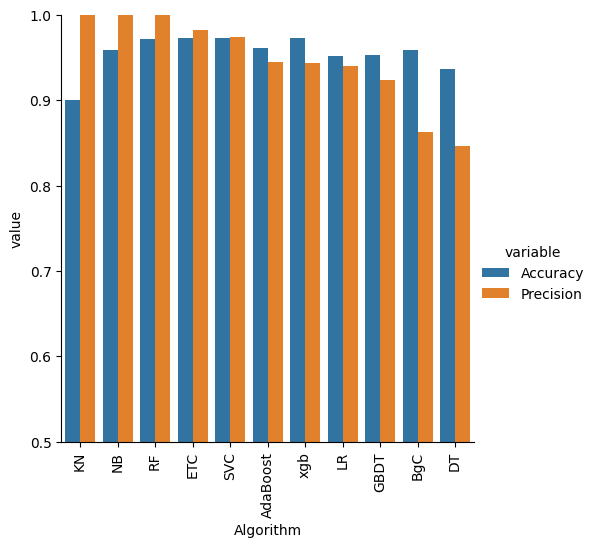

In [81]:
sns.catplot(x='Algorithm', y='value', hue = 'variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

MODEL IMPROVE 

CHANGE THE max_features parameter of TfIdf

In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_list,'Precision_max_ft_3000':precision_list}).sort_values('Precision_max_ft_3000',ascending=False)

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_list,'Precision_scaling':precision_list}).sort_values('Precision_scaling',ascending=False)

In [84]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [85]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_list,'Precision_num_chars':precision_list}).sort_values('Precision_num_chars',ascending=False)

In [87]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000,0.900387,1.000000
1,NB,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000,0.959381,1.000000
2,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
3,ETC,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138,0.972921,0.974138
5,AdaBoost,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455,0.961315,0.945455
6,xgb,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548,0.972921,0.943548
7,LR,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000,0.951644,0.940000
8,GBDT,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810,0.952611,0.923810
9,BgC,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595,0.958414,0.862595


In [88]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [89]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [90]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [91]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9787234042553191
Precision 1.0


In [92]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [93]:
from sklearn.ensemble import StackingClassifier

In [94]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [95]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


creating a pipeline for website 

THREE pipelines are needed for this 

1-->transform text

2-->vectorisation

3-->applying algorithum

In [96]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))